# Model Training

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [43]:
SEED = 2024

## Load Data

In [44]:
data = pd.read_csv('landmarks.csv')
data.head()

,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,landmark_9,...,landmark_33,landmark_34,landmark_35,landmark_36,landmark_37,landmark_38,landmark_39,landmark_40,landmark_41,class
0,0.269021,0.627812,0.345167,0.596388,0.392783,0.470169,0.408412,0.358588,0.415973,0.275938,...,0.396152,0.184724,0.378066,0.167347,0.307960,0.178140,0.361355,0.190305,0.393625,A
1,0.267041,0.626070,0.343561,0.594193,0.391439,0.469428,0.404707,0.356054,0.414581,0.274537,...,0.401223,0.184625,0.375465,0.167038,0.307408,0.178869,0.364908,0.191674,0.396950,A
2,0.251125,0.626742,0.327450,0.594018,0.373047,0.469112,0.385129,0.354036,0.393727,0.269895,...,0.399377,0.167602,0.381565,0.147093,0.312537,0.158888,0.363767,0.172913,0.395949,A
3,0.247124,0.626346,0.326674,0.586860,0.369971,0.463209,0.382276,0.349221,0.390538,0.263049,...,0.396080,0.166420,0.377317,0.143899,0.306451,0.154827,0.362051,0.169107,0.394520,A
4,0.247124,0.626346,0.326674,0.586860,0.369971,0.463209,0.382276,0.349221,0.390538,0.263049,...,0.396080,0.166420,0.377317,0.143899,0.306451,0.154827,0.362051,0.169107,0.394520,A


In [45]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

class_names = label_encoder.classes_

In [46]:
data.shape

(2634, 43)

In [47]:
target = data['class']
data = data.drop('class', axis=1)

## Train Test Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [49]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [50]:
X_train.shape, X_test.shape

((1843, 42), (791, 42))

In [51]:
y_train.shape, y_test.shape

((1843,), (791,))

## Model

In [52]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,660 (68.98 KB)

 Trainable params: 17,212 (67.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [53]:
history = model.fit(
    X_train, 
    y_train_encoded, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0969 - loss: 3.3835 - val_accuracy: 0.0894 - val_loss: 3.2624
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3811 - loss: 2.2524 - val_accuracy: 0.1274 - val_loss: 3.1596
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5164 - loss: 1.8123 - val_accuracy: 0.1626 - val_loss: 2.9801
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6359 - loss: 1.4376 - val_accuracy: 0.1518 - val_loss: 2.8045
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - loss: 1.1936 - val_accuracy: 0.1301 - val_loss: 2.6206
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7885 - loss: 0.9915 - val_accuracy: 0.3740 - val_loss: 2.3226
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.8186 - val_accuracy: 0.4878 - val_loss: 1.9299
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.7110 - val_accuracy: 0.8320 - val_loss:

In [54]:
model.save('asl_classifier_model.keras')

## Model Evaluation

In [55]:
from sklearn.metrics import classification_report

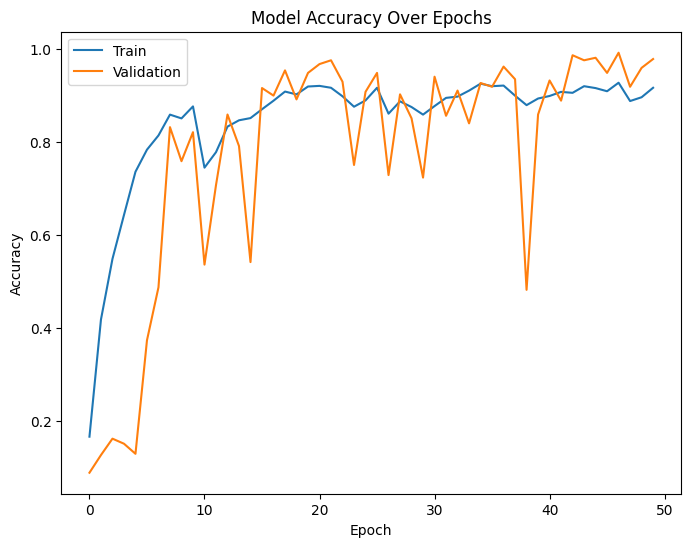

In [56]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

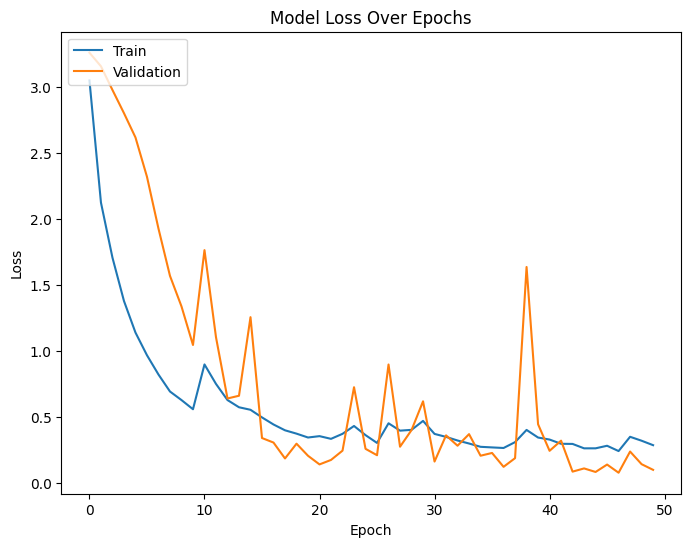

In [57]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.0858
Test loss: 0.08357527107000351
Test accuracy: 0.9721871018409729


In [59]:
# Get predicted probabilities 
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [60]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        26
           B       1.00      1.00      1.00        35
           C       1.00      1.00      1.00        29
           D       1.00      1.00      1.00        28
           E       1.00      1.00      1.00        28
           F       1.00      1.00      1.00        25
           G       1.00      1.00      1.00        25
           H       1.00      1.00      1.00        15
           I       1.00      1.00      1.00        24
           J       1.00      1.00      1.00        29
           K       1.00      1.00      1.00        21
           L       1.00      1.00      1.00        30
           M       0.93      0.97      0.95        29
           N       1.00      1.00      1.00        25
           O       1.00      0.96      0.98        28
           P       1.00      1.00      1.00        34
           Q       1.00      1.00      1.00        31
           R       0.67    

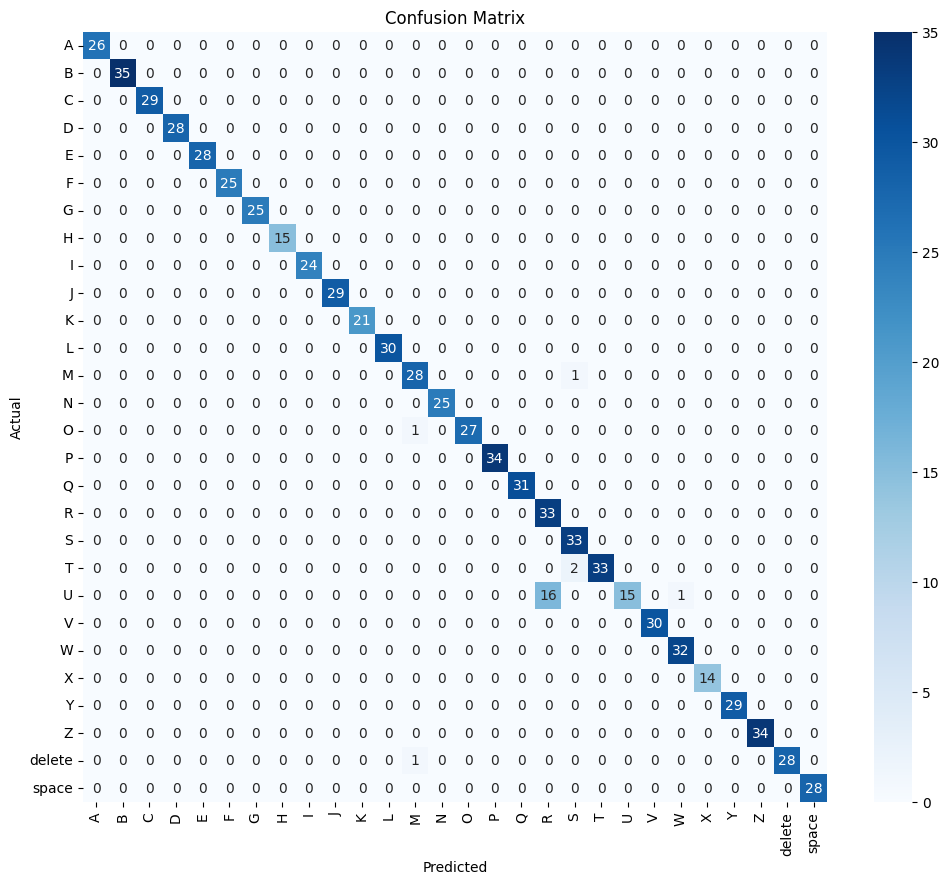

In [61]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()